## 강화학습
강화 학습은 어떤 환경 안에서 정의된 에이전트가 현재의 상태를 인식하여,<br>
**선택 가능한 행동들 중 보상을 최대화하는 행동** 혹은 행동 순서를 선택하는 방법이다.

<br>

강화 학습에서 다루는 '환경'은 주로 **마르코프 결정 과정**(MDP)으로 주어진다.<br>
마르코프 결정 과정 문제를 해결하는 기존의 방식과 강화 학습이 다른 지점은,<br>
강화 학습은 마르코프 결정 과정에 대한 지식을 요구하지 않는다는 점과,<br>
강화 학습은 크기가 매우 커서 결정론적 방법을 적용할 수 없는 규모의 마르코프 결정 과정 문제를 다룬다는 점이다.

<br>

강화 학습은 또한 입출력 쌍으로 이루어진 훈련 집합이 제시되지 않으며,<br>
잘못된 행동에 대해서도 명시적으로 정정이 일어나지 않는다는 점에서 일반적인 지도 학습과 다르다.<br>
대신, 강화학습의 초점은 학습 과정에서의 성능이며, 이는 탐색(exploration)과 이용(exploitation)의 균형을 맞춤으로써 제고된다.<br>

## 몬테카를로 방법

**몬테카를로 방법**은 반복된 무작위 추출을 이용하여 함수의 값을 수리적으로 근사하는 알고리즘을 부르는 용어이다.


수학이나 물리학 등에 자주 사용되며, 계산하려는 값이 닫힌 형식으로 표현되지 않거나 복잡한 경우에 근사적으로 계산할 때 사용된다.

### 몬테카를로 방법으로 원주율 계산

1. 무작위로 점을 생성합니다 (예: 10000개의 점).
2. 이 점들 중에서 원의 반지름(예: 1)보다 작은 거리에 있는 점의 수를 계산합니다.
3. 원의 넓이 공식과 사각형의 넓이 공식을 이용하여 π의 값을 추정합니다.


원의 넓이는 πr²이고, 사각형의 넓이는 4r²입니다 (여기서 r은 원의 반지름으로 1로 가정).<br>
**따라서 원 안에 들어간 점의 수를 전체 점의 수로 나눈 값에 4를 곱하면 π의 추정값을 얻을 수 있습니다.**

In [1]:
import matplotlib.pyplot as plt
import random

# 몬테카를로 알고리즘을 사용하여 원주율을 계산하는 함수
def monte_carlo_pi(num_points):
    inside_circle = 0
    r = 1 # 반지름

    # 시각화를 위한 점들의 x, y 좌표를 저장할 리스트
    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    for _ in range(num_points):
        x, y = random.random(), random.random()  # 0과 1 사이에서 무작위 점 생성
        distance = x**2 + y**2  # 원점에서의 거리 계산
        if distance <= r:  # 원 안에 있는 경우
            inside_circle += r
            x_inside.append(x)
            y_inside.append(y)
        else:  # 원 밖에 있는 경우
            x_outside.append(x)
            y_outside.append(y)

    # 원주율 추정값 계산
    pi_estimate = 4 * inside_circle / num_points
    return pi_estimate, x_inside, y_inside, x_outside, y_outside

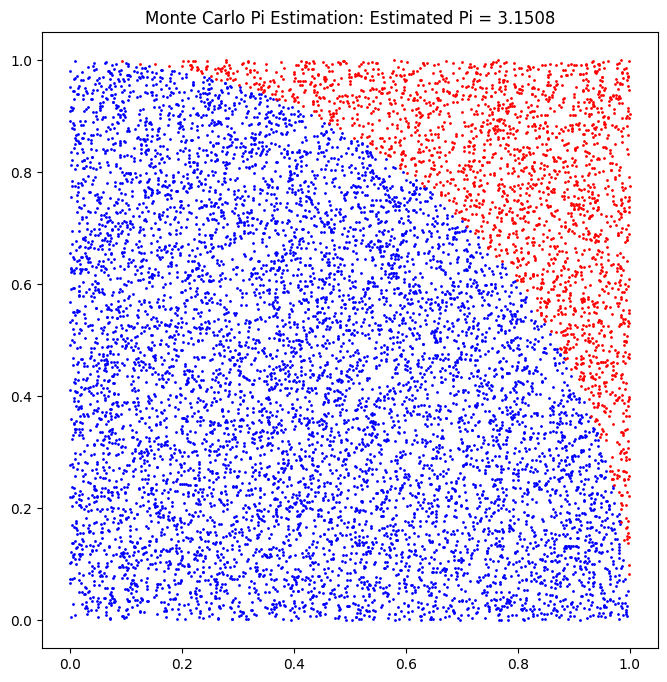

3.1508
<class 'float'>


In [2]:
# 점의 개수
num_points = 10000

# 몬테카를로 알고리즘으로 원주율 계산 및 점의 좌표 얻기
pi_estimate, x_inside, y_inside, x_outside, y_outside = monte_carlo_pi(num_points)

# 시각화
plt.figure(figsize=(8, 8))
plt.scatter(x_inside, y_inside, color='blue', s=1)  # 원 안의 점
plt.scatter(x_outside, y_outside, color='red', s=1)  # 원 밖의 점
plt.gca().set_aspect('equal', adjustable='box')  # x, y 축 비율을 같게 설정
plt.title(f"Monte Carlo Pi Estimation: Estimated Pi = {pi_estimate}")
plt.show()

print(pi_estimate)
print(type(pi_estimate))

### 무작위가 아닌, 일정한 간격으로 점을 생성하여 원주율(π)을 계산하는 방법

일반적으로 "격자 점 방법(Grid Point Method)" 또는 "격자 샘플링(Grid Sampling)"으로 불립니다. 이 방법은 격자 형태로 점을 배치하여 원주율(π)을 추정하는 간단하면서도 직관적인 방법입니다.

<br>

Grid Point Method는 몬테카를로 방법과는 달리 무작위성에 의존하지 않고, 고정된 간격으로 점을 배치하여 계산합니다. 이 방법은 무작위 샘플링에 비해 계산 비용이 높을 수 있지만, 격자 간격을 조절함으로써 원주율의 추정치의 정확도를 향상시킬 수 있습니다.

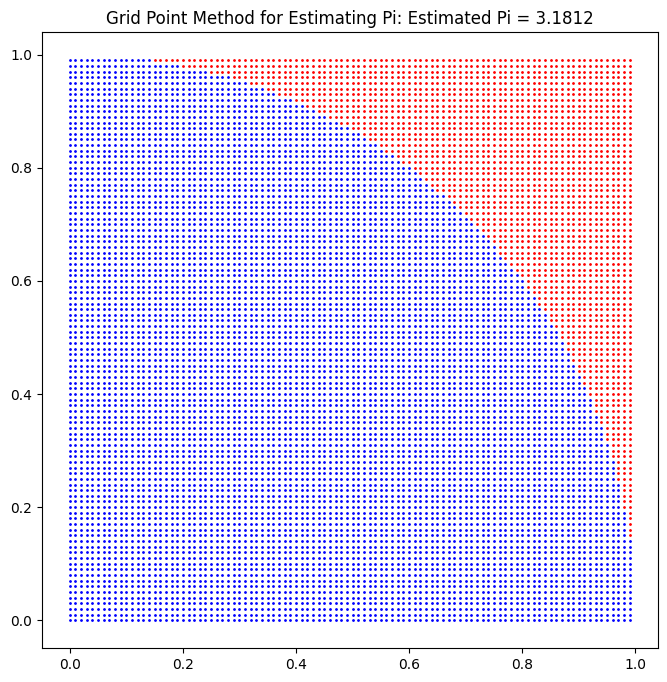

3.1812
<class 'float'>


In [3]:
# 격자 점 방법을 사용하여 원주율을 계산하는 함수
def grid_pi(num_points, grid_size):
    inside_circle = 0
    r = 1  # 반지름

    # 시각화를 위한 점들의 x, y 좌표를 저장할 리스트
    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    # 격자 간격에 따라 점들을 생성하고, 원 안에 있는지 확인
    for i in range(int(num_points**0.5)):
        for j in range(int(num_points**0.5)):
            x = i * grid_size
            y = j * grid_size
            distance = x**2 + y**2
            if distance <= r**2:  # 원 안에 있는 경우
                inside_circle += 1
                x_inside.append(x)
                y_inside.append(y)
            else:  # 원 밖에 있는 경우
                x_outside.append(x)
                y_outside.append(y)

    # 원주율 추정값 계산
    pi_estimate = 4 * inside_circle / num_points
    return pi_estimate, x_inside, y_inside, x_outside, y_outside

# 격자 크기와 점의 개수 설정
grid_size = 0.01
num_points = int((1/grid_size)**2)

# 격자 점 방법으로 원주율 계산
pi_estimate, x_inside, y_inside, x_outside, y_outside = grid_pi(num_points, grid_size)

# 시각화
plt.figure(figsize=(8, 8))
plt.scatter(x_inside, y_inside, color='blue', s=1)  # 원 안의 점
plt.scatter(x_outside, y_outside, color='red', s=1)  # 원 밖의 점
plt.gca().set_aspect('equal', adjustable='box')  # x, y 축 비율을 같게 설정
plt.title(f"Grid Point Method for Estimating Pi: Estimated Pi = {pi_estimate}")
plt.show()

print(pi_estimate)
print(type(pi_estimate))

### num_points = int((1/grid_size)**2)

1. grid_size: 이 변수는 격자의 간격을 나타냅니다. 예를 들어, grid_size = 0.01은 각 격자 칸이 0.01 x 0.01 크기임을 의미합니다.
2. 1/grid_size: 격자의 간격이 grid_size일 때, 한 변의 길이가 1인 정사각형 안에 들어갈 수 있는 격자 칸의 수를 계산합니다. 예를 들어, grid_size = 0.01이면, 한 변에는 100개의 격자 칸이 들어갈 수 있습니다 (1/0.01 = 100).
3. **(1/grid_size)**2**: 정사각형 전체 면적에 들어갈 수 있는 총 격자 칸의 수를 계산합니다. 정사각형의 한 변에 격자 칸이 1/grid_size개 있으므로, 전체 면적에는 (1/grid_size)**2개의 격자 칸이 들어갈 수 있습니다. 예를 들어, grid_size = 0.01이면, 전체 면적에는 10,000개의 격자 칸이 들어갑니다 (100^2 = 10,000`).

## 두 함수의 성능 비교

In [4]:
import time

def performance_comparison(num_points_grid, grid_size, num_points_monte_carlo):
    """
    격자 점 방법과 몬테카를로 방법의 성능을 비교하는 함수.
    각 방법의 실행 시간을 측정하고, 원주율의 추정치를 반환합니다.
    """
    # 격자 점 방법 성능 측정
    start_time_grid = time.time()
    pi_estimate_grid, _, _, _, _ = grid_pi(num_points_grid, grid_size)
    end_time_grid = time.time()
    grid_duration = end_time_grid - start_time_grid

    # 몬테카를로 방법 성능 측정
    start_time_monte_carlo = time.time()
    pi_estimate_monte_carlo, _, _, _, _ = monte_carlo_pi(num_points_monte_carlo)
    end_time_monte_carlo = time.time()
    monte_carlo_duration = end_time_monte_carlo - start_time_monte_carlo

    return pi_estimate_grid, grid_duration, pi_estimate_monte_carlo, monte_carlo_duration

# 격자 점 방법과 몬테카를로 방법의 성능 비교를 위한 파라미터 설정
num_points_grid = int((1/0.01)**2)  # 격자 점 방법에서 사용할 점의 수
grid_size = 0.01  # 격자 크기
num_points_monte_carlo = 10000  # 몬테카를로 방법에서 사용할 점의 수

# 성능 비교 실행
pi_estimate_grid, grid_duration, pi_estimate_monte_carlo, monte_carlo_duration = performance_comparison(num_points_grid, grid_size, num_points_monte_carlo)

# 비교 결과 출력
print("Grid Point Method:")
print(f"Estimated Pi: {pi_estimate_grid}")
print(f"Execution Time: {grid_duration} seconds\n")

print("Monte Carlo Method:")
print(f"Estimated Pi: {pi_estimate_monte_carlo}")
print(f"Execution Time: {monte_carlo_duration} seconds")

Grid Point Method:
Estimated Pi: 3.1812
Execution Time: 0.03571605682373047 seconds

Monte Carlo Method:
Estimated Pi: 3.1572
Execution Time: 0.013527631759643555 seconds


In [5]:
# 다양한 격자 점의 개수에 대한 성능 비교 및 출력을 위한 코드
grid_sizes = [0.01, 0.00707, 0.00577, 0.005]  # 여러 격자 크기 설정
num_points_monte_carlo = 10000  # 몬테카를로 방법에서 사용할 점의 수

for grid_size in grid_sizes:
    num_points_grid = int((1/grid_size)**2)  # 격자 점 방법에서 사용할 점의 수 계산

    # 성능 비교 실행
    pi_estimate_grid, grid_duration, pi_estimate_monte_carlo, monte_carlo_duration = performance_comparison(num_points_grid, grid_size, num_points_monte_carlo)

    # 비교 결과 출력
    print(f"Grid Size: {grid_size}")
    print(f"Monte Carlo Number: {num_points_monte_carlo}")
    print("Grid Point Method:")
    print(f"  Estimated Pi: {pi_estimate_grid}")
    print(f"  Execution Time: {grid_duration} seconds")
    print("Monte Carlo Method:")
    print(f"  Estimated Pi: {pi_estimate_monte_carlo}")
    print(f"  Execution Time: {monte_carlo_duration} seconds\n")
    num_points_monte_carlo+=10000

Grid Size: 0.01
Monte Carlo Number: 10000
Grid Point Method:
  Estimated Pi: 3.1812
  Execution Time: 0.02731490135192871 seconds
Monte Carlo Method:
  Estimated Pi: 3.1376
  Execution Time: 0.024838685989379883 seconds

Grid Size: 0.00707
Monte Carlo Number: 20000
Grid Point Method:
  Estimated Pi: 3.1664500649805056
  Execution Time: 0.026090621948242188 seconds
Monte Carlo Method:
  Estimated Pi: 3.1386
  Execution Time: 0.026662826538085938 seconds

Grid Size: 0.00577
Monte Carlo Number: 30000
Grid Point Method:
  Estimated Pi: 3.1624717006259155
  Execution Time: 0.037374258041381836 seconds
Monte Carlo Method:
  Estimated Pi: 3.1390666666666664
  Execution Time: 0.06053662300109863 seconds

Grid Size: 0.005
Monte Carlo Number: 40000
Grid Point Method:
  Estimated Pi: 3.1606
  Execution Time: 0.0781407356262207 seconds
Monte Carlo Method:
  Estimated Pi: 3.1575
  Execution Time: 0.06035661697387695 seconds



격자 점 방법은 정확도가 중요한 상황에 적합하고, 몬테카를로 방법은 빠른 계산과 적당한 정확도가 필요한 경우에 더 적합합니다. 선택은 목적과 계산 자원의 제한에 따라 달라질 수 있습니다.

# 결론

강화학습에서 에이전트가 무작위 행동(random actions)을 취하는 이유는 여러 면에서 격자 점 방법과 몬테카를로 방법의 차이점과 유사한 맥락을 가집니다. 강화학습의 핵심 목적 중 하나는 최적의 정책(policy) 또는 행동을 학습하는 것인데, 이 과정에서 무작위성이 중요한 역할을 합니다. 다음과 같은 이유로 무작위 행동이 필요합니다:

<br>

1. 탐험(Exploration): 강화학습에서는 환경에 대한 충분한 정보를 얻기 위해 에이전트가 다양한 행동을 시도해야 합니다. 무작위 행동은 에이전트가 환경의 다양한 상태를 탐험하게 하여, 더 나은 학습과 일반화를 가능하게 합니다.
2. 지역 최적해(Local Optima) 피하기: 무작위성은 에이전트가 특정 행동이나 전략에 고착되어 지역 최적해에 갇히는 것을 방지합니다. 이를 통해 에이전트는 더 광범위한 전략을 탐색하고, 전반적으로 더 나은 정책을 학습할 수 있습니다.
3. 비효율적인 공간 탐색 방지: 격자 점 방법과 같은 고정된 패턴으로 환경을 탐색하는 것은 특정 상황이나 환경에서는 비효율적일 수 있습니다. 무작위 행동은 에이전트가 환경의 다양한 부분을 더 효율적으로 탐색하도록 돕습니다.
4. 일반화 및 강인성(Generalization and Robustness): 무작위 행동을 통해 에이전트는 다양한 상황에 대응하는 방법을 배우며, 이는 에이전트의 일반화 능력과 강인성을 향상시킵니다.

<br>

요약하면, 강화학습에서의 무작위 행동은 다양한 상황과 환경에서 최적의 전략을 찾기 위해 필요하며, 이는 격자 점 방법과 몬테카를로 방법의 차이점을 통해 이해할 수 있는 유사한 개념입니다. 격자 점 방법은 계획된, 규칙적인 접근법을 제시하는 반면, 몬테카를로 방법과 같은 무작위성은 더 광범위하고 다양한 탐색을 가능하게 합니다.

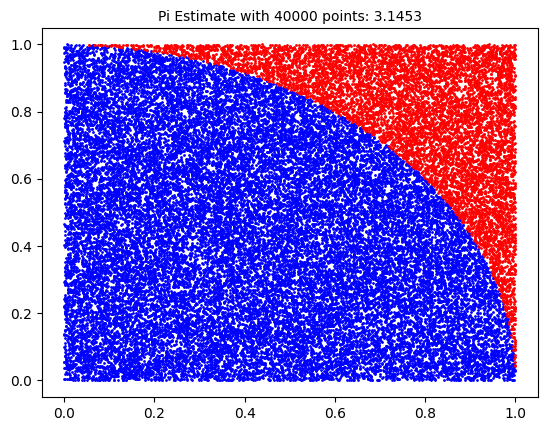

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from IPython.display import HTML

# 몬테카를로 알고리즘을 사용하여 원주율을 계산하는 함수 (수정된 버전)
def monte_carlo_pi(num_points):
    inside_circle = 0

    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    for _ in range(num_points):
        x, y = random.random(), random.random()
        distance = x**2 + y**2
        if distance <= 1:  # 원 안에 있는 경우
            inside_circle += 1
            x_inside.append(x)
            y_inside.append(y)
        else:  # 원 밖에 있는 경우
            x_outside.append(x)
            y_outside.append(y)

    pi_estimate = 4 * inside_circle / num_points
    return x_inside, y_inside, x_outside, y_outside, pi_estimate

# 애니메이션을 위한 준비
fig, ax = plt.subplots()
frames = []  # 애니메이션 프레임을 저장할 리스트

for num_points in range(10000, 50000, 10000):
    x_inside, y_inside, x_outside, y_outside, pi_estimate = monte_carlo_pi(num_points)

    # 각 프레임의 시각화 생성
    inside = ax.scatter(x_inside, y_inside, color='blue', s=1)
    outside = ax.scatter(x_outside, y_outside, color='red', s=1)
    title = ax.text(0.5, 1.01, f"Pi Estimate with {num_points} points: {pi_estimate:.4f}", ha='center', va='bottom', transform=ax.transAxes)

    # 프레임 추가
    frames.append([inside, outside, title])

# 애니메이션 생성
ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True, repeat_delay=1000)


HTML(ani.to_jshtml())